In [71]:
url = 'http://en.wikipedia.org/wiki/Machine_learning'

In [72]:
import requests
text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Machine learning - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"41e3c26b-33a2-4160-a57b-b22fefd5e7ab","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Machine_learning","wgTitle":"Machine learning","wgCurRevisionId":1066862836,"wgRevisionId":1066862836,"wgArticleId":233488,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 errors: missing periodical","CS1 maint: uses authors parameter","CS1 maint: url-status","Articles with short description","Short description 

In [73]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])


 Machine learning - Wikipedia Machine learning From Wikipedia, the free encyclopedia Jump to navigation Jump to search Study of algorithms that improve automatically through experience For the journal, see  Machine Learning (journal) . "Statistical learning" redirects here. For statistical learning in linguistics, see  statistical learning in language acquisition . Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection Data Cleaning AutoML Association rules Reinforcement learning Structured prediction Feature engineering Feature learning Online learning Semi-supervised learning Unsupervised learning Learning to rank Grammar induction Supervised learning ( classification  •  regression ) Decision trees Ensembles Bagging Boosting Random forest k -NN Linear regression Naive Bayes Artificial neural networks Logistic regression Perceptron Relevance vector machine (RVM) Support vector machine (SVM) Clustering BIRCH CURE Hierarchi

In [65]:
import sys
!{sys.executable} -m pip install nlp_rake

In [66]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('data mining', 4.0),
 ('polynomial time', 4.0),
 ('main article', 4.0),
 ('dimensionality reduction', 4.0),
 ('anomaly detection', 4.0),
 ('data set', 4.0),
 ('bayesian networks', 4.0),
 ('language corpora', 4.0),
 ('mcgraw hill', 4.0),
 ('prentice hall', 4.0),
 ('mit press', 4.0),
 ('cs1 maint', 4.0),
 ('cite web', 4.0),
 ('retrieved 2018-08-20', 4.0),
 ('retrieved 2022-01-17', 4.0),
 ('artificial neuron', 3.9642857142857144),
 ('statistical learning', 3.9407894736842106),
 ('feature learning', 3.9407894736842106),
 ('reinforcement learning', 3.9407894736842106),
 ('deep learning', 3.9407894736842106),
 ('machine learning', 3.908180778032037),
 ('neural networks', 3.9),
 ('pattern recognition', 3.9),
 ('artificial intelligence', 3.864285714285714),
 ('bayesian network', 3.857142857142857),
 ('supervised learning', 3.8407894736842105),
 ('speech recognition', 3.833333333333333),
 ('isbn 978-0-262-01243-0', 3.814814814814815),
 ('explicitly programmed', 3.8),
 ('biological brain', 3.8

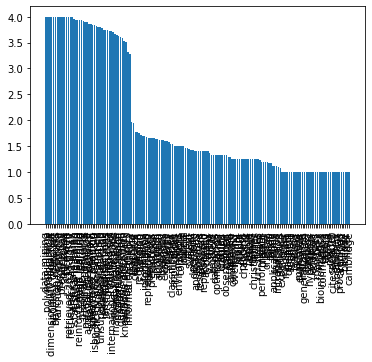

In [67]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

In [68]:
!{sys.executable} -m pip install wordcloud

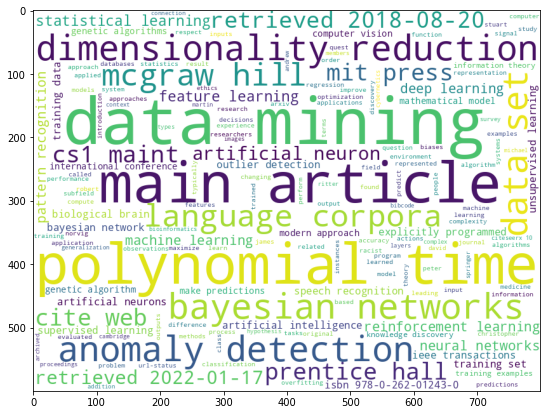

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white', width=800, height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

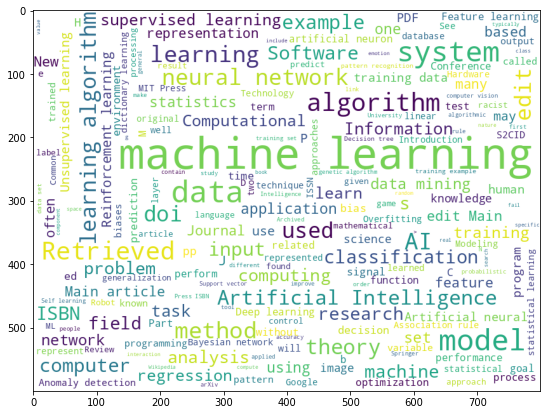

In [70]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))